In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

import xgboost as xgb

from sklearn import metrics

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 6

In [3]:
data = pd.read_csv('parkinsons.csv')
data.shape

(195, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
data.drop(columns = ['name'], inplace = True)

In [6]:
x = data.drop(columns= ['status'])
y = data['status']

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
pca = PCA()
x = pca.fit_transform(x)

<BarContainer object of 22 artists>

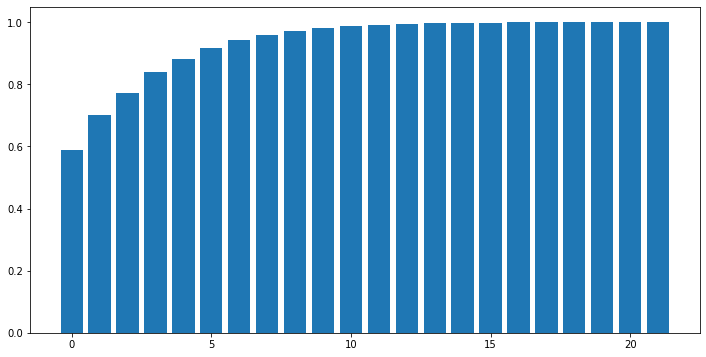

In [9]:
p = pca.explained_variance_ratio_.cumsum()
plt.bar(range(len(p)), p)

In [10]:
list(zip(range(len(pca.explained_variance_ratio_.cumsum())),pca.explained_variance_ratio_.cumsum()))

[(0, 0.589005041490037),
 (1, 0.7019993419973103),
 (2, 0.7720916033084696),
 (3, 0.8386818850900142),
 (4, 0.8829507985132219),
 (5, 0.9160920900240422),
 (6, 0.9411941305143293),
 (7, 0.9576670093638883),
 (8, 0.9708414704786339),
 (9, 0.9810290286627253),
 (10, 0.9874183534409),
 (11, 0.9921838685212019),
 (12, 0.9953537289319833),
 (13, 0.997088559868133),
 (14, 0.9980890913628256),
 (15, 0.99889761584087),
 (16, 0.9994638157443101),
 (17, 0.9997917310084291),
 (18, 0.9999506658901394),
 (19, 0.9999999820473424),
 (20, 0.9999999984943704),
 (21, 0.9999999999999996)]

In [11]:
x=pd.DataFrame(x)

In [12]:
x= x.iloc[:,0:12]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 22 )

In [14]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', seed = 22)
xg_cl.fit(x_train, y_train)
y_pred = xg_cl.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[11  1]
 [ 1 26]]
0.9487179487179487


In [15]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [16]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
params__grid = {
    'n_estimators' : range(50,150),
    'max_depth': range(2, 12),
    'colsample_bytree': np.arange(0.5,1),
    'reg_alpha' : np.arange(0,0.6),
    'reg_lambda' : np.arange(0,0.8),
}
search = RandomizedSearchCV(param_distributions=params__grid, estimator=clf_xgb, scoring = 'accuracy',
                                cv = 4,n_iter=100 )
search.fit(x_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                  

In [17]:
search.best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=79, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.0,
              reg_lambda=0.0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
search.best_score_

0.8910256410256411

In [38]:
search.best_params_

{'reg_alpha': 0.5,
 'n_estimators': 100,
 'max_depth': 6,
 'colsample_bytree': 0.6}

In [42]:
clf_xgb_1 = xgb.XGBClassifier(objective = 'binary:logistic', max_depth = 7, n_estimators = 50, reg_alpha = 0.2 ,
                              reg_lambda = 0.1, colsample_bytree = 0.5 )
clf_xgb_1.fit(x_train,y_train)
y_pred_2 = clf_xgb_1.predict(x_test)

In [43]:
metrics.accuracy_score(y_test,y_pred_2)

0.8974358974358975

In [41]:
metrics.confusion_matrix(y_test,y_pred_2)

array([[ 6,  6],
       [ 2, 25]], dtype=int64)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
tc = DecisionTreeClassifier()
tc.fit(x_train,y_train)
yp = tc.predict(x_test)
metrics.accuracy_score(y_test,yp)

0.7948717948717948